## Importing libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns 
sns.set()

## Loading the dataset

In [65]:
raw_data = pd.read_csv(r'C:\Users\swagat\Downloads\CAR DETAILS FROM CAR DEKHO.csv')

## Read about dataset

In [66]:
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [67]:
raw_data.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [68]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## Drop the variable that is not necessary for our prediction

In [69]:
data = raw_data.drop(['name'], axis = 1)
data 

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


## Converting 'year' to 'age' column

In [70]:
max = data['year'].max()
age = data['year'].apply(lambda x:(max+1)-x)
data.drop(['year'], axis = 1, inplace = True)
data ['age'] = age
data

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7
...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,7
4336,409999,80000,Diesel,Individual,Manual,Second Owner,7
4337,110000,83000,Petrol,Individual,Manual,Second Owner,12
4338,865000,90000,Diesel,Individual,Manual,First Owner,5


## Exploring the PDF (Probability distributive function)

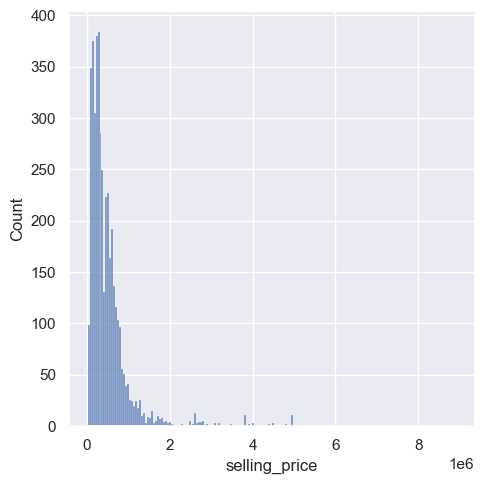

In [71]:
sns.displot(data['selling_price'])
plt.show()

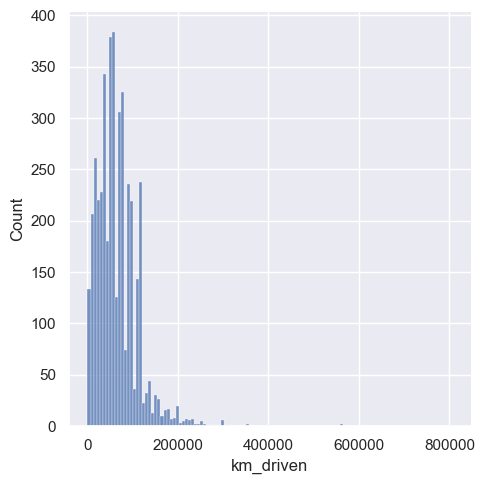

In [72]:
sns.displot(data['km_driven'])
plt.show()

In [73]:
q = data['km_driven'].quantile(0.99)
data = data[data['km_driven']<q]
data.describe(include = 'all')

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
count,4.294000e+03,4294.000000,4294,4294,4294,4294,4294.000000
unique,NaN,NaN,5,3,2,5,NaN
top,NaN,NaN,Petrol,Individual,Manual,First Owner,NaN
freq,NaN,NaN,2118,3204,3848,2810,NaN
mean,5.056701e+05,63857.645552,NaN,NaN,NaN,NaN,7.871216
std,5.810018e+05,39391.684738,NaN,NaN,NaN,NaN,4.207737
min,2.000000e+04,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,2.100000e+05,35000.000000,NaN,NaN,NaN,NaN,4.000000
50%,3.535000e+05,60000.000000,NaN,NaN,NaN,NaN,7.000000
75%,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN,10.000000


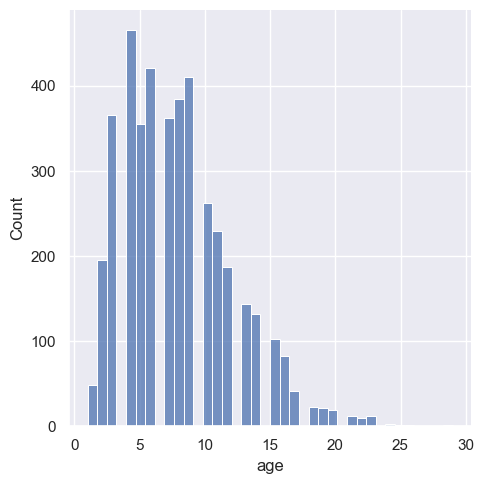

In [74]:
sns.displot(data['age'])
plt.show()

## Checking the OLS assumption

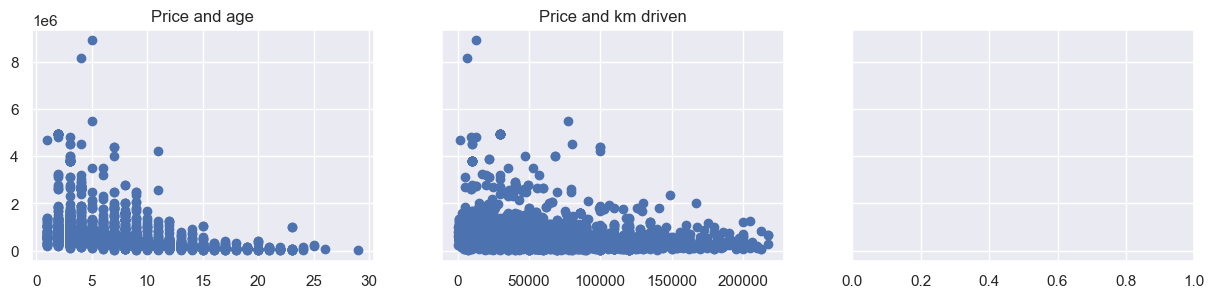

In [75]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['age'],data['selling_price'])
ax1.set_title('Price and age')
ax2.scatter(data['km_driven'],data['selling_price'])
ax2.set_title('Price and km driven')

plt.show()

In [76]:
log_price = np.log(data['selling_price'])
data ['log_price'] = log_price
data 

C:\Users\swagat\AppData\Local\Temp\ipykernel_6620\3139589133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ['log_price'] = log_price


,selling_price,km_driven,fuel,seller_type,transmission,owner,age,log_price
0,60000,70000,Petrol,Individual,Manual,First Owner,14,11.002100
1,135000,50000,Petrol,Individual,Manual,First Owner,14,11.813030
2,600000,100000,Diesel,Individual,Manual,First Owner,9,13.304685
3,250000,46000,Petrol,Individual,Manual,First Owner,4,12.429216
4,450000,141000,Diesel,Individual,Manual,Second Owner,7,13.017003
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,7,12.923910
4336,409999,80000,Diesel,Individual,Manual,Second Owner,7,12.923910
4337,110000,83000,Petrol,Individual,Manual,Second Owner,12,11.608236
4338,865000,90000,Diesel,Individual,Manual,First Owner,5,13.670485


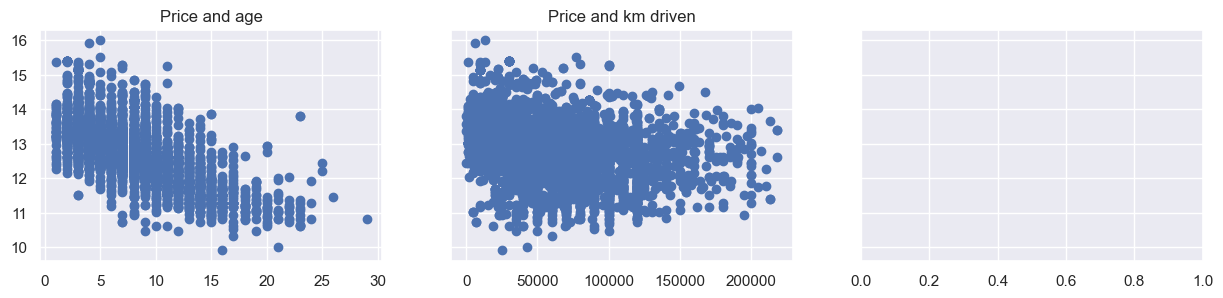

In [77]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['age'],data['log_price'])
ax1.set_title('Price and age')
ax2.scatter(data['km_driven'],data['log_price'])
ax2.set_title('Price and km driven')

plt.show()

In [78]:
data.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
age              0
log_price        0
dtype: int64

In [79]:
data.columns.values

array(['selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'age', 'log_price'], dtype=object)

## Calculating VIF to check multicollinearity

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['km_driven','age']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [81]:
vif

,VIF,Features
0,3.935683,km_driven
1,3.935683,age


In [82]:
data = pd.get_dummies(data, drop_first=True) 

In [83]:
data

,selling_price,km_driven,age,log_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,11.002100,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,14,11.813030,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,9,13.304685,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,4,12.429216,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,7,13.017003,True,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,7,12.923910,True,False,False,False,True,False,True,False,True,False,False
4336,409999,80000,7,12.923910,True,False,False,False,True,False,True,False,True,False,False
4337,110000,83000,12,11.608236,False,False,False,True,True,False,True,False,True,False,False
4338,865000,90000,5,13.670485,True,False,False,False,True,False,True,False,False,False,False


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[[ 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [85]:
vif

,VIF,Features
0,0.002561,fuel_Diesel
1,1.001339,fuel_Electric
2,0.046373,fuel_LPG
3,0.002707,fuel_Petrol
4,0.001483,seller_type_Individual
5,0.010836,seller_type_Trustmark Dealer
6,0.002453,transmission_Manual
7,0.013157,owner_Fourth & Above Owner
8,0.001339,owner_Second Owner
9,0.059956,owner_Test Drive Car


# Linear Regression

## Setting dependent and independent variables

In [86]:
target = data['log_price']
inputs = data.drop(['log_price'], axis = 1)

## Feature Scalling

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [88]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[-0.76716116,  0.15594839,  1.45672083, ..., -0.58434219,
        -0.06304561, -0.27160346],
       [-0.63805875, -0.35183211,  1.45672083, ..., -0.58434219,
        -0.06304561, -0.27160346],
       [ 0.16237618,  0.91761913,  0.26829524, ..., -0.58434219,
        -0.06304561, -0.27160346],
       ...,
       [-0.68109289,  0.48600571,  0.98135059, ...,  1.71132603,
        -0.06304561, -0.27160346],
       [ 0.61853802,  0.66372889, -0.68244523, ..., -0.58434219,
        -0.06304561, -0.27160346],
       [-0.48313586, -0.60572236, -0.68244523, ..., -0.58434219,
        -0.06304561, -0.27160346]])

In [89]:
## Split train-test data

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state = 365)

In [91]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [92]:
y_hat = reg.predict(x_train)

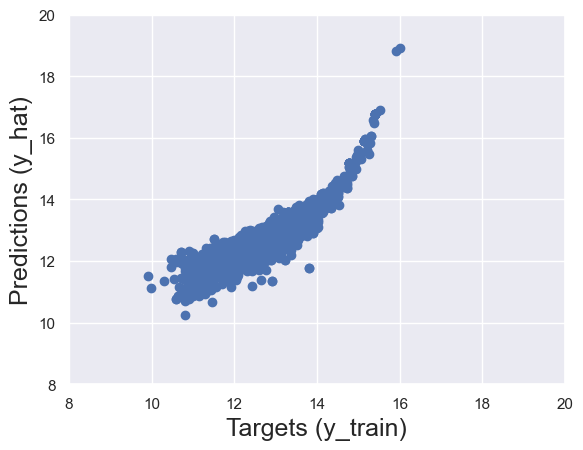

In [93]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)',size =18)
plt.xlim(8,20)
plt.ylim(8,20)
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

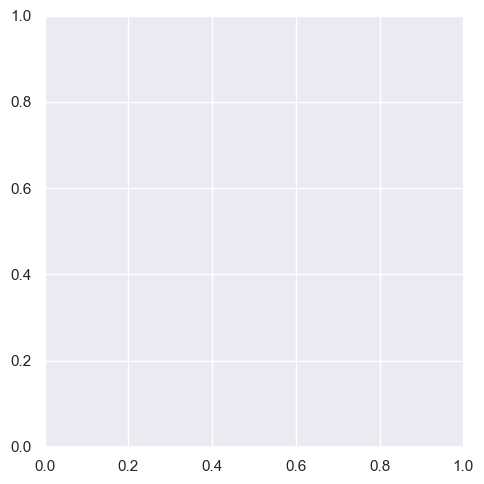

In [94]:
sns.displot(y_train - y_hat, kind='kde')
plt.title('Residual PDF', size = 18)
plt.show()

In [95]:
reg.score(x_train, y_train)

0.820108901932513

In [96]:
reg.intercept_

12.76276097481908

In [97]:
reg.coef_

array([ 0.40148944,  0.00382722, -0.3683361 ,  0.17305713,  0.00879081,
       -0.01137795,  0.01664563, -0.04766153,  0.03191892, -0.06143152,
       -0.02185092, -0.00835694,  0.00175759, -0.01911657])

In [98]:
reg.summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg.summary ['Weights'] = reg.coef_
reg.summary

,Features,Weights
0,selling_price,0.401489
1,km_driven,0.003827
2,age,-0.368336
3,fuel_Diesel,0.173057
4,fuel_Electric,0.008791
5,fuel_LPG,-0.011378
6,fuel_Petrol,0.016646
7,seller_type_Individual,-0.047662
8,seller_type_Trustmark Dealer,0.031919
9,transmission_Manual,-0.061432


## Prediction

In [99]:
y_pred = reg.predict(x_test)

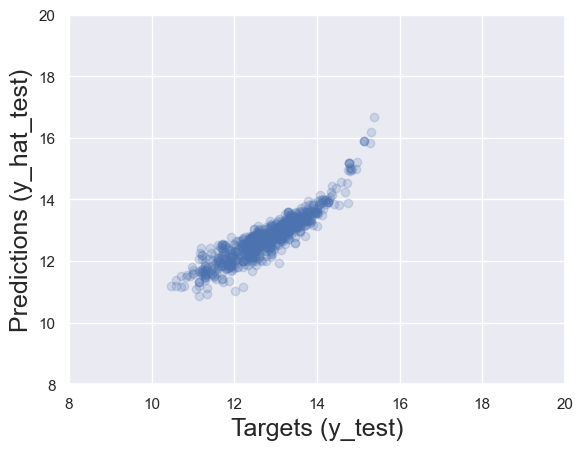

In [100]:
plt.scatter(y_test,y_pred, alpha = 0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)',size =18)
plt.xlim(8,20)
plt.ylim(8,20)
plt.show()

In [101]:
df_pf = pd.DataFrame(np.exp(y_pred), columns=['Prediction']) #performance
df_pf.head()

,Prediction
0,643205.426135
1,919749.350437
2,335711.670685
3,122028.636530
4,344714.888239


In [102]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,643205.426135,NaN
1,919749.350437,135000.0
2,335711.670685,NaN
3,122028.636530,NaN
4,344714.888239,NaN
...,...,...
854,338178.600425,NaN
855,314570.994125,400000.0
856,166964.651728,NaN
857,252671.713466,NaN


In [103]:
y_test = y_test.reset_index(drop=True)

In [104]:
y_test.head()

0    13.091902
1    13.623139
2    13.122363
3    11.002100
4    12.409013
Name: log_price, dtype: float64

In [105]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,643205.426135,484999.0
1,919749.350437,825000.0
2,335711.670685,500000.0
3,122028.636530,60000.0
4,344714.888239,245000.0
...,...,...
854,338178.600425,300000.0
855,314570.994125,185000.0
856,166964.651728,220000.0
857,252671.713466,133000.0


## Difference between Target and predicted value

In [106]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [107]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,8.590000e+02,8.590000e+02,8.590000e+02,859.000000
mean,5.088256e+05,5.070348e+05,-1.790835e+03,28.237895
std,9.548353e+05,5.390862e+05,5.811553e+05,28.796632
min,5.253806e+04,3.500000e+04,-1.256561e+07,0.051171
25%,2.249766e+05,2.200000e+05,-4.610190e+04,10.055193
50%,3.521567e+05,3.650000e+05,1.376806e+04,21.457664
75%,5.070960e+05,6.000000e+05,1.073693e+05,35.515695
max,1.736561e+07,4.800000e+06,1.474677e+06,261.783589
